# Ciência dos Dados - 2°Semestre - Engenharia
#### Carlos Eduardo Dip

## Tema: Desenvolvimento econômico de países dentro e fora do Mercado Comum do Sul (Mercosul)

<img src = 'flag_mercosul.png'>

#### Hipótese:
Países que fazem parte da união aduaneira devem ter mercados em maior crescimento do que os que não estão, como sugerido na pesquisa "Os impactos do Mercosul sobre o comérico: Uma abordagem gravitacional" de Bruno Ferreira Cordeiro, da USP.  
< https://www.teses.usp.br/teses/disponiveis/12/12138/tde-06092016-144804/publico/CorrigidaBruno.pdf > Acesso em 26/8/2019 às 18h40min.

#### Mecanismo:
Espera-se que, devido ao propósito da União Aduaneira, o comércio entre países participantes seja ampliado, ou ao menos deixe de ser reduzido, aumentando a competitividade com produtos importados de páises externos à união, através principalmente de reduções tributárias. Isso, por sua vez impulsionaria o crescimento economico dos países envolvidos, e também os protegeria de recessões.


#### Dados:

Para avaliar o crescimento econômico dos países, foram usados 2 indicadores. O primeiro é o crescimento relativo anual do PIB (em %), e o segundo é a renda pessoal, em dólares internacionais, normalizada pelo poder de compra.

Os dados analisados foram retirados do banco de dados https://www.gapminder.org/data/.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
from pprint import pprint


global_alpha = 0.2
data_GDP = pd.read_excel('Data/gdp.xlsx').rename({'country':'Country'},axis = 1 ).set_index('Country')
data_GDP_World_Mean = pd.read_excel('Data/gdp.xlsx').mean(axis = 0)
data_GDP_World_Median = pd.read_excel('Data/gdp.xlsx').median(axis = 0)
data_income = pd.read_excel('Data/income.xlsx').rename({'country':'Country'},axis = 1 ).set_index('Country')
for year in range(1800, 1930):
    if year in data_GDP and year != 1800:
        del data_GDP[year]
    if year in data_GDP_World_Median:
        del data_GDP_World_Median[year]
    if year in data_income:
        del data_income[year]
    if year in data_GDP_World_Mean:
        del data_GDP_World_Mean[year]
for year in range(2014,2041):
    if year in data_income:
        del data_income[year]
    if year in data_GDP_World_Mean:
        del data_GDP_World_Mean[year]
    if year in data_GDP_World_Median:
        del data_GDP_World_Median[year]
        
Mercosul = ["Brazil",
            "Argentina",
            "Uruguay",
            "Paraguay"]

Non_Mercosul = ["Bolivia",
                "Colombia",
                "Chile",
                "Venezuela",
                "Ecuador",
                "Peru"]

all_south = Non_Mercosul+Mercosul

bool_series_1 = [country in all_south for country in data_GDP.index.tolist()]
data_GDP = data_GDP.loc[bool_series_1]
data_GDP["Mercosul"] = [int(country in Mercosul) for country in data_GDP.index.tolist()]

bool_series_2 = [country in all_south for country in data_income.index.tolist()]
data_income = data_income.loc[bool_series_2]
data_income["Mercosul"] = [int(country in Mercosul) for country in data_income.index.tolist()]

data_all = data_income.join(data_GDP, how = 'left', rsuffix = "_GDP", lsuffix = '_income')

## Análise exploratória inicial

#### Primeira visualização dos dados 
Aqui, constroem-se gráficos para facilitar a visualização da informação disponível, com intuito de conhecer melhor o comportamento das variáveis envolvidas, e dos dados em geral.

### Os dataframes:

Abaixo, o primeiro dataframe; Um dataframe de todos os países da América do sul, mostrando sua renda ao longo do tempo, desde 1930 até 2013, e uma última coluna, mostrando 1 para países do Mercosul, e 0 para os outros.

In [2]:
data_income

,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Mercosul
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,7650,6920,6510,6640,6990,7110,7010,7360,7220,7330,...,15500,16600,17900,18400,17200,18700,19600,19200,19500,1
Bolivia,2430,2460,2480,2510,2530,2560,2580,2610,2630,2660,...,4700,4840,4970,5190,5280,5410,5600,5790,6090,0
Brazil,2000,1870,1900,2010,2130,2140,2330,2370,2410,2400,...,12300,12600,13300,13800,13700,14500,15000,15100,15400,1
Chile,4130,3200,2660,3210,3810,3950,4070,4540,4500,4510,...,17000,17900,18600,19000,18500,19400,20400,21300,22000,0
Colombia,2320,2240,2350,2440,2550,2560,2650,2650,2770,2850,...,9260,9760,10300,10500,10600,10900,11500,11800,12300,0
Ecuador,1720,1760,1810,1850,1900,1940,1980,2030,2070,2110,...,8610,8840,8880,9290,9180,9350,9930,10300,10700,0
Paraguay,3290,3330,3360,3400,3440,3480,3520,3560,3610,3650,...,6120,6320,6570,6890,6530,7290,7510,7310,8230,1
Peru,3760,3370,3160,3430,3790,4050,4140,4090,4050,3970,...,7600,8070,8650,9320,9310,9960,10400,10900,11400,0
Uruguay,9310,7480,6750,5740,6650,6850,6980,6910,7250,7200,...,13000,13500,14300,15300,15900,17100,17900,18500,19300,1


Em seguida, o dataframe com os dados de aumento do PIB dos mesmo países, com a mesma coluna Mercosul.

In [3]:
data_GDP

,1930,1931,1932,1933,1934,1935,1936,1937,1938,1939,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Mercosul
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,-4.440,-6.73,-3.35,4.67,7.80,4.16,0.907,7.51,0.45,4.2000,...,9.08,8.21,8.39,6.50,0.598,8.88,8.59,1.64,3.98,1
Bolivia,2.090,2.12,2.10,2.13,2.12,2.10,2.090,2.12,2.10,2.0900,...,4.40,4.42,4.16,5.73,2.970,3.77,4.81,4.85,6.46,0
Brazil,-2.010,-3.58,4.40,9.23,9.13,3.10,12.200,4.69,4.49,2.4600,...,2.76,3.96,6.09,5.17,-0.330,7.53,2.73,1.09,2.24,1
Chile,-16.000,-21.20,-15.50,23.20,20.70,5.75,4.920,13.70,1.15,2.1000,...,6.36,5.83,5.20,3.04,-0.910,5.73,5.92,5.45,4.21,0
Colombia,-0.884,-1.63,6.69,5.67,6.35,2.46,5.340,1.56,6.57,6.2300,...,5.31,7.03,7.22,3.83,1.910,4.20,6.83,4.36,4.37,0
Ecuador,1.460,3.27,3.40,2.83,2.79,3.26,3.060,2.82,3.12,3.0600,...,5.22,4.51,2.24,6.36,0.997,3.19,7.87,4.81,3.92,0
Paraguay,3.600,3.66,3.60,3.66,3.60,3.55,3.700,3.65,3.69,3.6300,...,2.29,4.68,5.26,6.16,-4.160,12.80,4.10,-1.25,13.00,1
Peru,-11.500,-8.09,-3.83,11.30,13.50,9.38,4.800,1.35,1.57,0.5410,...,6.17,7.28,7.81,9.27,0.377,8.30,6.45,5.85,4.61,0
Uruguay,13.700,-17.30,-7.17,-12.50,19.10,5.89,4.750,1.79,7.89,0.0139,...,6.12,3.98,6.50,7.18,2.430,8.88,5.67,3.92,4.20,1


Por fim, um dataframe que une os dataframes anteriores.

In [4]:
data_all

,1930_income,1931_income,1932_income,1933_income,1934_income,1935_income,1936_income,1937_income,1938_income,1939_income,...,2005_GDP,2006_GDP,2007_GDP,2008_GDP,2009_GDP,2010_GDP,2011_GDP,2012_GDP,2013_GDP,Mercosul_GDP
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,7650,6920,6510,6640,6990,7110,7010,7360,7220,7330,...,9.08,8.21,8.39,6.50,0.598,8.88,8.59,1.64,3.98,1
Bolivia,2430,2460,2480,2510,2530,2560,2580,2610,2630,2660,...,4.40,4.42,4.16,5.73,2.970,3.77,4.81,4.85,6.46,0
Brazil,2000,1870,1900,2010,2130,2140,2330,2370,2410,2400,...,2.76,3.96,6.09,5.17,-0.330,7.53,2.73,1.09,2.24,1
Chile,4130,3200,2660,3210,3810,3950,4070,4540,4500,4510,...,6.36,5.83,5.20,3.04,-0.910,5.73,5.92,5.45,4.21,0
Colombia,2320,2240,2350,2440,2550,2560,2650,2650,2770,2850,...,5.31,7.03,7.22,3.83,1.910,4.20,6.83,4.36,4.37,0
Ecuador,1720,1760,1810,1850,1900,1940,1980,2030,2070,2110,...,5.22,4.51,2.24,6.36,0.997,3.19,7.87,4.81,3.92,0
Paraguay,3290,3330,3360,3400,3440,3480,3520,3560,3610,3650,...,2.29,4.68,5.26,6.16,-4.160,12.80,4.10,-1.25,13.00,1
Peru,3760,3370,3160,3430,3790,4050,4140,4090,4050,3970,...,6.17,7.28,7.81,9.27,0.377,8.30,6.45,5.85,4.61,0
Uruguay,9310,7480,6750,5740,6650,6850,6980,6910,7250,7200,...,6.12,3.98,6.50,7.18,2.430,8.88,5.67,3.92,4.20,1


### Os Gráficos

Agora contruindo séries temporais, para facilitar a visualização dos dados. Para facilitar a visualização e a análise, foram criadas series representativas dos países de cada grupo (que não necessariamente condizem com um país em específico), a partir da média dos integrantes a cada ano.

In [5]:

## - Construindo series de dados:
# GDP-Mercosul
data_GDP_Merco = data_GDP.loc[data_GDP['Mercosul'] == 1]
del data_GDP_Merco['Mercosul']
series_GDP_1 = data_GDP_Merco.mean(axis=0, skipna = True)
# GDP-Resto
data_GDP_no_Merco = data_GDP.loc[data_GDP['Mercosul'] == 0]
del data_GDP_no_Merco['Mercosul']
series_GDP_2 = data_GDP_no_Merco.mean(axis=0, skipna = True)

#Renda-Mercosul
data_income_Merco = data_income.loc[data_income['Mercosul'] == 1]
del data_income_Merco['Mercosul']
series_income_1 = data_income_Merco.mean(axis=0, skipna = True)
# Renda-Resto
data_income_no_Merco = data_income.loc[data_income['Mercosul'] == 0]
del data_income_no_Merco['Mercosul']
series_income_2 = data_income_no_Merco.mean(axis=0, skipna = True)

X_INC_1 = series_income_1
Y_GDP_1 = series_GDP_1

X_INC_2 = series_income_2
Y_GDP_2 = series_GDP_2

#### Primeiro gráfico: PIB x Tempo

Aqui vemos como o crescimento do PIB varia de acordo com o tempo para ambos os grupos de países (Dentro e fora da união aduaneira). 

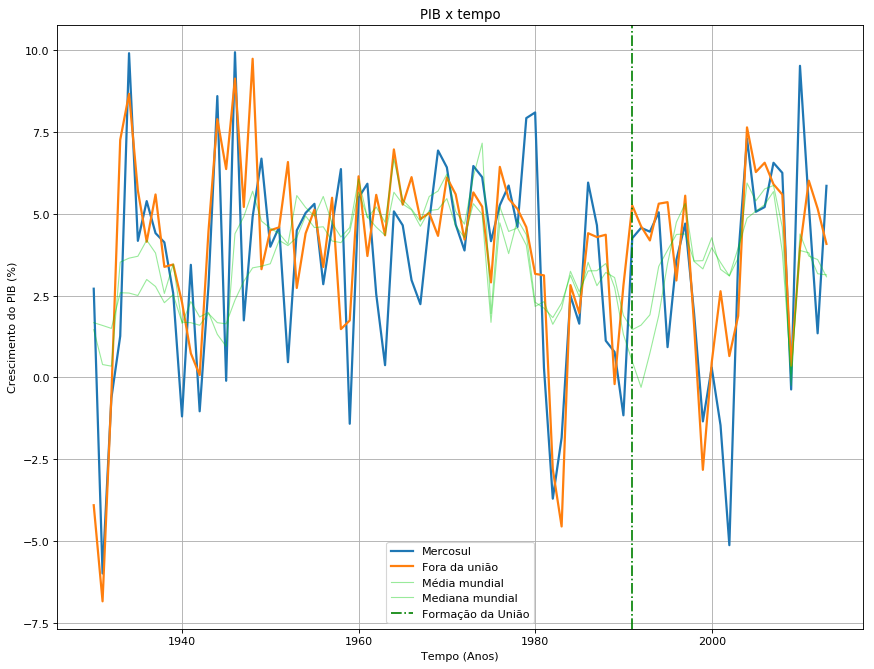

In [6]:
# Gráfico PIB x Tempo

plt.figure(num=None, figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(1930,2014), series_GDP_1, lw = 2, label = "Mercosul")
plt.plot(range(1930,2014), series_GDP_2, lw = 2, label = "Fora da união")
plt.plot(range(1930,2014), data_GDP_World_Mean, lw = 1, label = "Média mundial", alpha = global_alpha+0.2, c = '#01cc07')
plt.plot(range(1930,2014), data_GDP_World_Median, lw = 1, label = "Mediana mundial", alpha = global_alpha+0.2, c = '#01cc07')
plt.xlabel('Tempo (Anos)')
plt.ylabel('Crescimento do PIB (%)')
plt.title('PIB x tempo')
plt.axvline(1991, ls = '-.', c = 'g', label = 'Formação da União')
plt.legend()
plt.grid(True)
plt.show()

#### Segundo gráfico: Renda x Tempo

Aqui percebemos o crescimento da renda dos países.

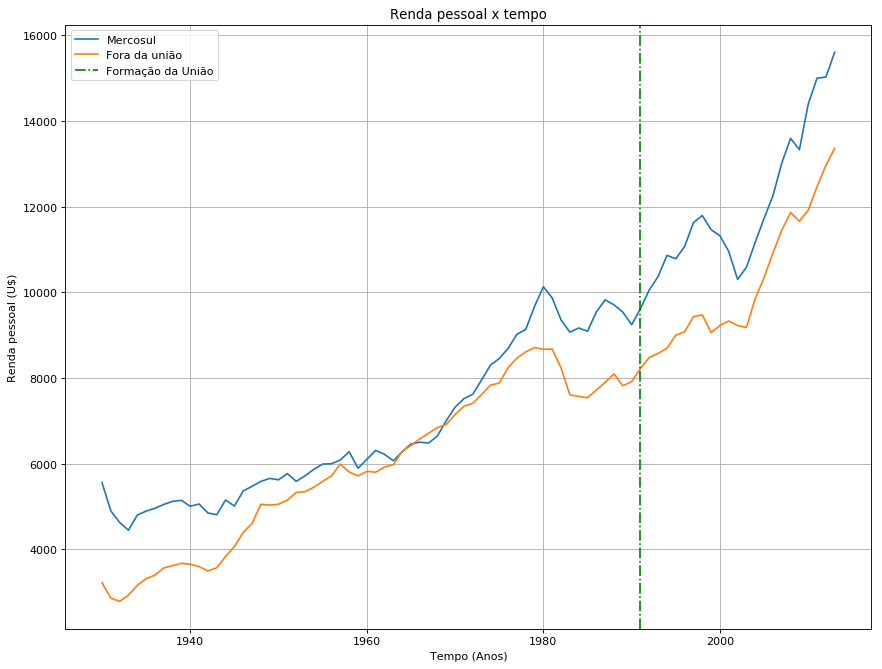

In [7]:
#Gráfico Renda pessoal x Tempo

plt.figure(num=None, figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(range(1930,2014), series_income_1, label = "Mercosul")
plt.plot(range(1930,2014), series_income_2, label = "Fora da união")
plt.xlabel('Tempo (Anos)')
plt.ylabel('Renda pessoal (U$)')
plt.title('Renda pessoal x tempo')
plt.axvline(1991, ls = '-.', c = 'g', label = 'Formação da União')
plt.legend()
plt.grid(True)
plt.show()

#### Terceiro gráfico: Renda x PIB

Aqui visualizamos a relação entre a renda de um país e seu PIB.

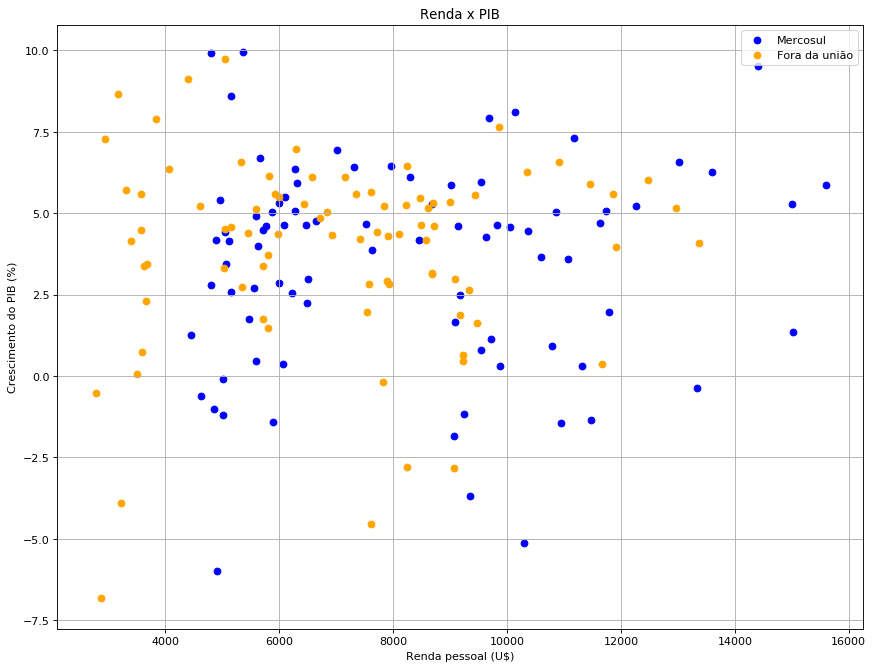

In [8]:
plt.figure(num=None, figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X_INC_1, Y_GDP_1, label = "Mercosul", c = 'blue')
plt.scatter(X_INC_2, Y_GDP_2, label = "Fora da união", c = 'orange')
plt.xlabel('Renda pessoal (U$)')
plt.ylabel('Crescimento do PIB (%)')
plt.title('Renda x PIB')
plt.grid(True)
plt.legend()
plt.show()

## Análise explicativa:

#### Percebendo tendências e correlações:

Agora vamos analisar os dados explorados para conseguir avaliar se a hipótese é válida ou não.

In [9]:
values = {}
Delta_values = {}
values['Correlação_Income'] = series_income_1.corr(series_income_2)
values['Correlação_GDP'] = series_GDP_1.corr(series_GDP_2)

In [10]:
data_GDP_Merco = data_GDP.loc[data_GDP['Mercosul'] == 1]
del data_GDP_Merco['Mercosul']
series_GDP_1 = data_GDP_Merco.mean(axis=0, skipna = True)

data_GDP_no_Merco = data_GDP.loc[data_GDP['Mercosul'] == 0]
del data_GDP_no_Merco['Mercosul']
series_GDP_2 = data_GDP_no_Merco.mean(axis=0, skipna = True)

series_GDP_1_pre = series_GDP_1.loc[range(1930,1992)]
series_GDP_1_pos = series_GDP_1.loc[range(1991,2014)]

series_GDP_2_pre = series_GDP_2.loc[range(1930,1992)]
series_GDP_2_pos = series_GDP_2.loc[range(1991,2014)]

data_GDP_World_Mean_pre = data_GDP_World_Mean.loc[range(1930,1992)]
data_GDP_World_Mean_pos = data_GDP_World_Mean.loc[range(1991,2014)]

data_GDP_World_Median_pre = data_GDP_World_Median.loc[range(1930,1992)]
data_GDP_World_Median_pos = data_GDP_World_Median.loc[range(1991,2014)]

## Analisando tendências:

Quebramos as séries de médias das variáveis dentro de cada grupo, e analisamos as tendências para cada variável.

#### Primeiro gráfico: Tendência de variação no PIB

Aqui, avaliamos a tendência dos grupos antes e depois de surgir o Mercosul. 

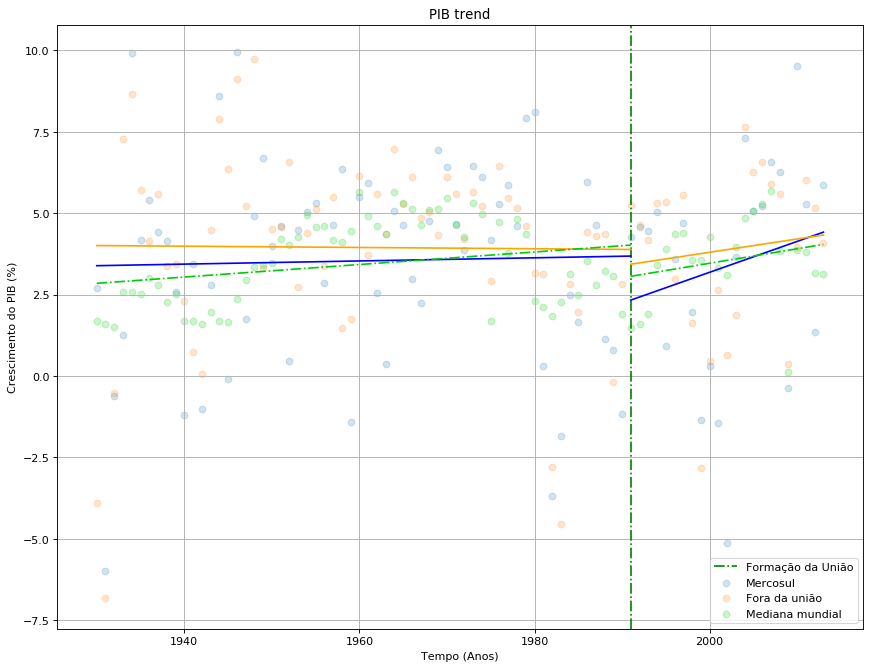

In [11]:
plt.figure(num=None, figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(range(1930,2014), series_GDP_1, label = "Mercosul", alpha = global_alpha)
plt.scatter(range(1930,2014), series_GDP_2, label = "Fora da união", alpha = global_alpha)
# plt.scatter(range(1930,2014), data_GDP_World_Mean, label = "Média mundial", alpha = global_alpha, c = '#01cc07')
plt.scatter(range(1930,2014), data_GDP_World_Median, label = "Mediana mundial", alpha = global_alpha, c = '#01cc07')


plt.xlabel('Tempo (Anos)')
plt.ylabel('Crescimento do PIB (%)')
plt.title('PIB trend')
plt.axvline(1991, ls = '-.', c = 'g', label = 'Formação da União')
plt.legend()

#--------------------

y_1 = series_GDP_1_pre
x_1 = range(1930,1992) 
b_1, m_1 = polyfit(x_1, y_1, 1)
plt.plot(x_1, b_1 + m_1 * x_1, '-', color="blue")

y_2 = series_GDP_1_pos
x_2 = range(1991,2014) 
b_2, m_2 = polyfit(x_2, y_2, 1)
plt.plot(x_2, b_2 + m_2 * x_2, '-', color="blue")

#--------------------

values['GDP_Merco_pre'] = m_1
values['GDP_Merco_pos'] = m_2

y_1 = series_GDP_2_pre
x_1 = range(1930,1992) 
b_1, m_1 = polyfit(x_1, y_1, 1)
plt.plot(x_1, b_1 + m_1 * x_1, '-', color="orange")

y_2 = series_GDP_2_pos
x_2 = range(1991,2014) 
b_2, m_2 = polyfit(x_2, y_2, 1)
plt.plot(x_2, b_2 + m_2 * x_2, '-', color="orange")

values['GDP_NoMerco_pre'] = m_1
values['GDP_NoMerco_pos'] = m_2

#--------------------

# y_1 = data_GDP_World_Mean_pre
# x_1 = range(1930,1992) 
# b_1, m_1 = polyfit(x_1, y_1, 1)
# plt.plot(x_1, b_1 + m_1 * x_1, '-.', c = '#01cc07')

# y_2 = data_GDP_World_Mean_pos
# x_2 = range(1991,2014) 
# b_2, m_2 = polyfit(x_2, y_2, 1)
# plt.plot(x_2, b_2 + m_2 * x_2, '-.', c = '#01cc07')

#--------------------

y_1 = data_GDP_World_Median_pre
x_1 = range(1930,1992) 
b_1, m_1 = polyfit(x_1, y_1, 1)
plt.plot(x_1, b_1 + m_1 * x_1, '-.', c = '#01cc07')

y_2 = data_GDP_World_Median_pos
x_2 = range(1991,2014) 
b_2, m_2 = polyfit(x_2, y_2, 1)
plt.plot(x_2, b_2 + m_2 * x_2, '-.', c = '#01cc07')

values['GDP_World_pre'] = m_1
values['GDP_World_pos'] = m_2

plt.grid(True)
plt.show()



In [12]:
data_income_Merco = data_income.loc[data_income['Mercosul'] == 1]
del data_income_Merco['Mercosul']
series_income_1 = data_income_Merco.mean(axis=0, skipna = True)

data_income_no_Merco = data_income.loc[data_income['Mercosul'] == 0]
del data_income_no_Merco['Mercosul']
series_income_2 = data_income_no_Merco.mean(axis=0, skipna = True)

series_income_1_pre = series_income_1.loc[range(1930,1992)]
series_income_1_pos = series_income_1.loc[range(1991,2014)]

series_income_2_pre = series_income_2.loc[range(1930,1992)]
series_income_2_pos = series_income_2.loc[range(1991,2014)]


#### Segundo gráfico: Tendência de variação da renda

Aqui, avaliamos a tendência dos grupos antes e depois de surgir o Mercosul. 

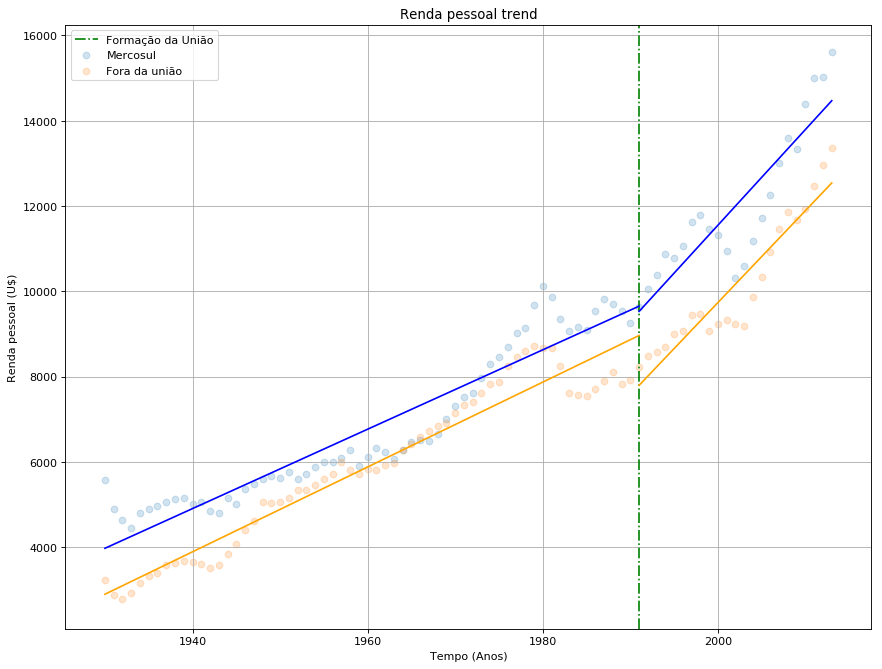

In [13]:
plt.figure(num=None, figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(range(1930,2014), series_income_1, label = "Mercosul", alpha = global_alpha)
plt.scatter(range(1930,2014), series_income_2, label = "Fora da união", alpha = global_alpha)
plt.xlabel('Tempo (Anos)')
plt.ylabel('Renda pessoal (U$)')
plt.title('Renda pessoal trend')
plt.axvline(1991, ls = '-.', c = 'g', label = 'Formação da União')
plt.legend()

y_1 = series_income_1_pre
x_1 = range(1930,1992) 
b_1, m_1 = polyfit(x_1, y_1, 1)
plt.plot(x_1, b_1 + m_1 * x_1, '-', color="blue")

y_2 = series_income_1_pos
x_2 = range(1991,2014) 
b_2, m_2 = polyfit(x_2, y_2, 1)
plt.plot(x_2, b_2 + m_2 * x_2, '-', color="blue")

values['Income_Merco_pre'] = m_1
values['Income_Merco_pos'] = m_2

y_1 = series_income_2_pre
x_1 = range(1930,1992) 
b_1, m_1 = polyfit(x_1, y_1, 1)
plt.plot(x_1, b_1 + m_1 * x_1, '-', color="orange")

y_2 = series_income_2_pos
x_2 = range(1991,2014) 
b_2, m_2 = polyfit(x_2, y_2, 1)
plt.plot(x_2, b_2 + m_2 * x_2, '-', color="orange")

plt.grid(True)
plt.show()

values['Income_NoMerco_pre'] = m_1
values['Income_NoMerco_pos'] = m_2

#### Terceiro gráfico: Relação entre renda e PIB

Esse gráfico serve para evidenciar que, dados ambos os grupos, a relação PIB x Renda independe do Mercosul.

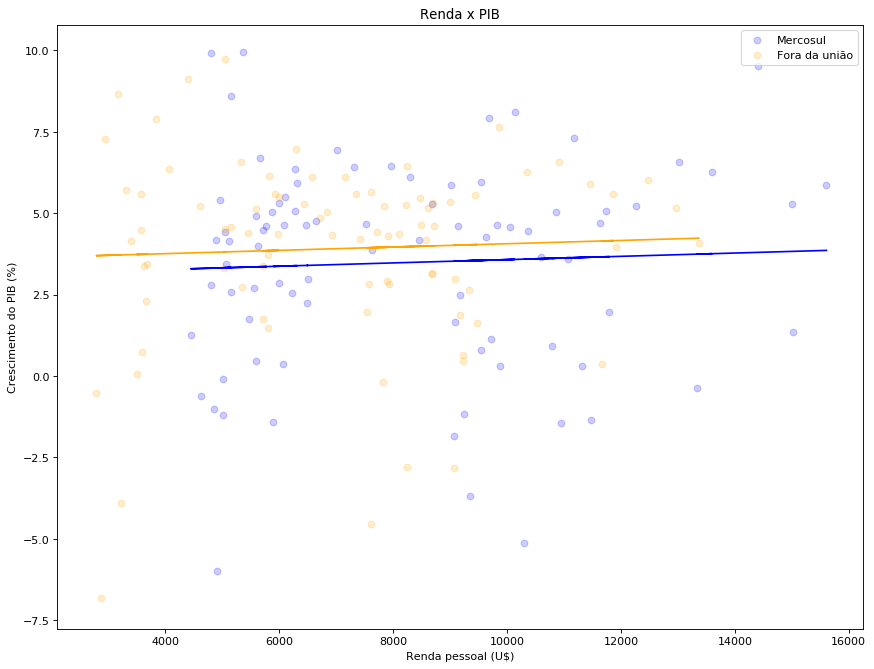

In [14]:
X_INC_1 = series_income_1
Y_GDP_1 = series_GDP_1

X_INC_2 = series_income_2
Y_GDP_2 = series_GDP_2

plt.figure(num=None, figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X_INC_1, Y_GDP_1, label = "Mercosul", c = 'blue', alpha = global_alpha)
plt.scatter(X_INC_2, Y_GDP_2, label = "Fora da união", c = 'orange', alpha = global_alpha)
plt.xlabel('Renda pessoal (U$)')
plt.ylabel('Crescimento do PIB (%)')
plt.title('Renda x PIB')
plt.legend()

x_1 = X_INC_1
y_1 = Y_GDP_1 
b_1, m_1 = polyfit(x_1, y_1, 1)
plt.plot(x_1, b_1 + m_1 * x_1, '-', color="blue")

x_2 = X_INC_2
y_2 = Y_GDP_2
b_2, m_2 = polyfit(x_2, y_2, 1)
plt.plot(x_2, b_2 + m_2 * x_2, '-', c = 'orange')

values['crossplot_merco'] = m_1
values['crossplot_nomerco'] = m_2

plt.show()

In [21]:
Delta_values['GDP_Merco_Delta'] = np.fabs(values['GDP_Merco_pos']/values['GDP_Merco_pre'])
Delta_values['GDP_NoMerco_Delta'] =  np.fabs(values['GDP_NoMerco_pos']/values['GDP_NoMerco_pre'])
Delta_values['Income_Merco_Delta'] = np.fabs(values['Income_Merco_pos']/values['Income_Merco_pre'])
Delta_values['Income_NoMerco_Delta'] = np.fabs(values['Income_NoMerco_pos']/values['Income_NoMerco_pre'])
Delta_values['Cross_World'] = np.fabs(values['GDP_World_pos']/values['GDP_NoMerco_pre'])
Delta_values['Cross_Delta'] = np.fabs(values['crossplot_merco']/values['crossplot_nomerco'])

# Conclusão:

In [22]:
pprint(Delta_values)

{'Cross_Delta': 0.9966730274798113,
 'Cross_World': 22.652004654513185,
 'GDP_Merco_Delta': 19.566069219747767,
 'GDP_NoMerco_Delta': 20.753196473331016,
 'Income_Merco_Delta': 2.412532782105284,
 'Income_NoMerco_Delta': 2.16813865172746}


#### Analisando coeficientes angulares de linhas de tendência

Após obter todos os coeficientes angulares das linhas de tendência dos grupos, devemos analisar como estes mudaram depois da criação do Mercosul. Para isso, dividimos o coeficiente após o surgimento da união, pelo que ele era anteriormente. Assim obtemos o aumento percentual a partir do momento de criação do Mercosul.

Dessa forma, podemos comparar diretamente os indicadores; 